## 深層学習の実習

### データをダウンロードする

In [ ]:
# 画像データのZIPファイルをダウンロード
!wget https://techacademy.s3.amazonaws.com/bootcamp/python/machine-learning/nagaoka_gis.zip

# ZIPファイルを解凍する
!unzip nagaoka_gis.zip

--2023-11-14 03:00:21--  https://techacademy.s3.amazonaws.com/bootcamp/python/machine-learning/nagaoka_gis.zip
Resolving techacademy.s3.amazonaws.com (techacademy.s3.amazonaws.com)... 52.219.8.189, 52.219.199.9, 52.219.150.33, ...
Connecting to techacademy.s3.amazonaws.com (techacademy.s3.amazonaws.com)|52.219.8.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4085252 (3.9M) [application/zip]
Saving to: ‘nagaoka_gis.zip’

nagaoka_gis.zip     100%[===================>]   3.90M  3.36MB/s    in 1.2s    

2023-11-14 03:00:23 (3.36 MB/s) - ‘nagaoka_gis.zip’ saved [4085252/4085252]

Archive:  nagaoka_gis.zip
   creating: nagaoka_gis/
   creating: nagaoka_gis/test/
   creating: nagaoka_gis/test/no/
  inflating: nagaoka_gis/test/no/08DE762D.jpg  
  inflating: nagaoka_gis/test/no/08EE050C.jpg  
  inflating: nagaoka_gis/test/no/08DE863C.jpg  
   creating: nagaoka_gis/test/yes/
  inflating: nagaoka_gis/test/yes/08EE780C.jpg  
  inflating: nagaoka_gis/test/yes/08EE972C

### 訓練データとテストデータそれぞれの画像ファイルを読み込む

#### `image_dataset_from_directory()` で読み込む

In [ ]:
# 訓練データとテストデータの画像を読み込む
# （サイズは縦横224pxにリサイズする）
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "nagaoka_gis/train",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "nagaoka_gis/test",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)

Found 20 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


#### データを確認する

In [ ]:
# データの詳細を表示する
list(train_dataset.as_numpy_iterator())[0]

(array([[[[ 89.      , 122.      , 111.      ],
          [ 89.      , 122.      , 111.      ],
          [ 87.      , 123.      , 111.      ],
          ...,
          [ 51.45156 ,  74.45156 ,  48.45156 ],
          [ 56.6295  ,  79.6295  ,  51.6295  ],
          [ 59.318783,  82.31879 ,  54.318783]],
 
         [[ 89.      , 122.      , 111.      ],
          [ 89.      , 122.      , 111.      ],
          [ 87.      , 123.      , 111.      ],
          ...,
          [ 69.39789 ,  92.39789 ,  63.880035],
          [ 62.578712,  85.57871 ,  57.578712],
          [ 65.73213 ,  88.73213 ,  60.732132]],
 
         [[ 89.      , 122.      , 111.      ],
          [ 89.      , 122.      , 111.      ],
          [ 87.      , 123.      , 111.      ],
          ...,
          [ 54.974716,  78.08696 ,  48.750233],
          [ 60.375   ,  83.375   ,  55.375   ],
          [ 67.64544 ,  90.64544 ,  62.645435]],
 
         ...,
 
         [[ 79.28571 , 112.28571 , 101.28571 ],
          [ 80.   

In [ ]:
# 分類名（no／yes）をリストとして格納する
class_names = train_dataset.class_names
class_names

['no', 'yes']

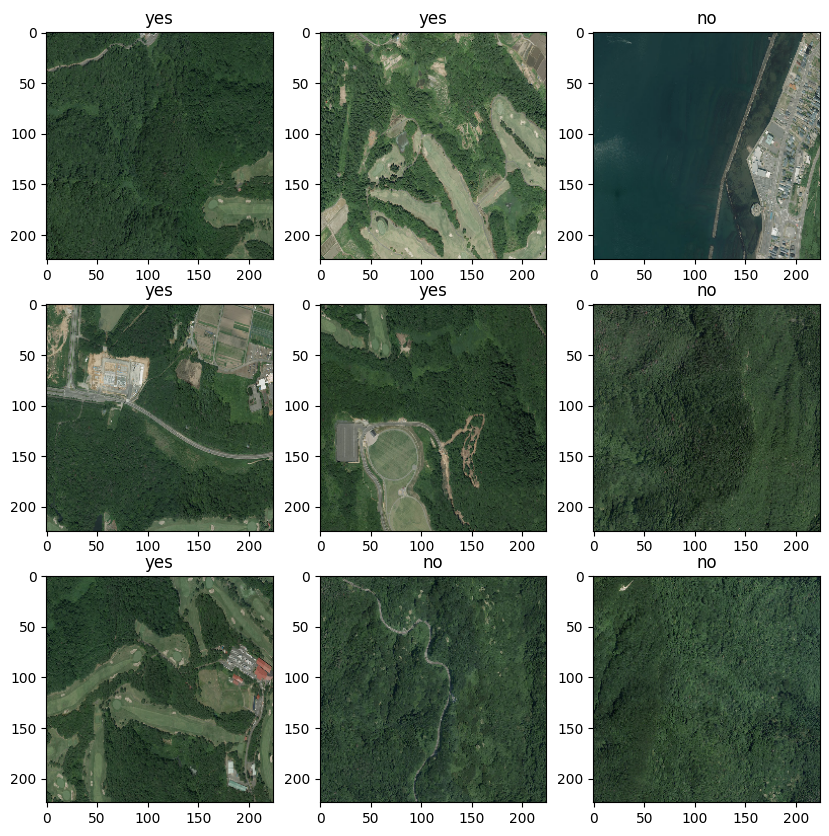

In [ ]:
# 訓練データの一部を表示して確認
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

### データの水増しを行なう

In [ ]:
# 画像の水増しをする関数の定義
def flip_left_right(image, label):   # 左右反転
    image = tf.image.flip_left_right(image)
    return image, label

def flip_up_down(image, label):      # 上下反転
    image = tf.image.flip_up_down(image)
    return image, label

def rot90(image, label):             # 反時計回りに90度回転
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):            # 反時計回りに180度回転
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):            # 反時計回りに270度回転
    image = tf.image.rot90(image, k=3)
    return image, label

In [ ]:
# 画像の水増し処理の実行
train_dataset_lr     = train_dataset.map(flip_left_right)
train_dataset_ud     = train_dataset.map(flip_up_down)
train_dataset_rot90  = train_dataset.map(rot90)
train_dataset_rot180 = train_dataset.map(rot180)
train_dataset_rot270 = train_dataset.map(rot270)

In [ ]:
# 水増ししたデータを訓練データに追加する
train_dataset = train_dataset.concatenate(train_dataset_lr)
train_dataset = train_dataset.concatenate(train_dataset_ud)
train_dataset = train_dataset.concatenate(train_dataset_rot90)
train_dataset = train_dataset.concatenate(train_dataset_rot180)
train_dataset = train_dataset.concatenate(train_dataset_rot270)

In [ ]:
# データをシャッフルする
train_dataset = train_dataset.shuffle(32)

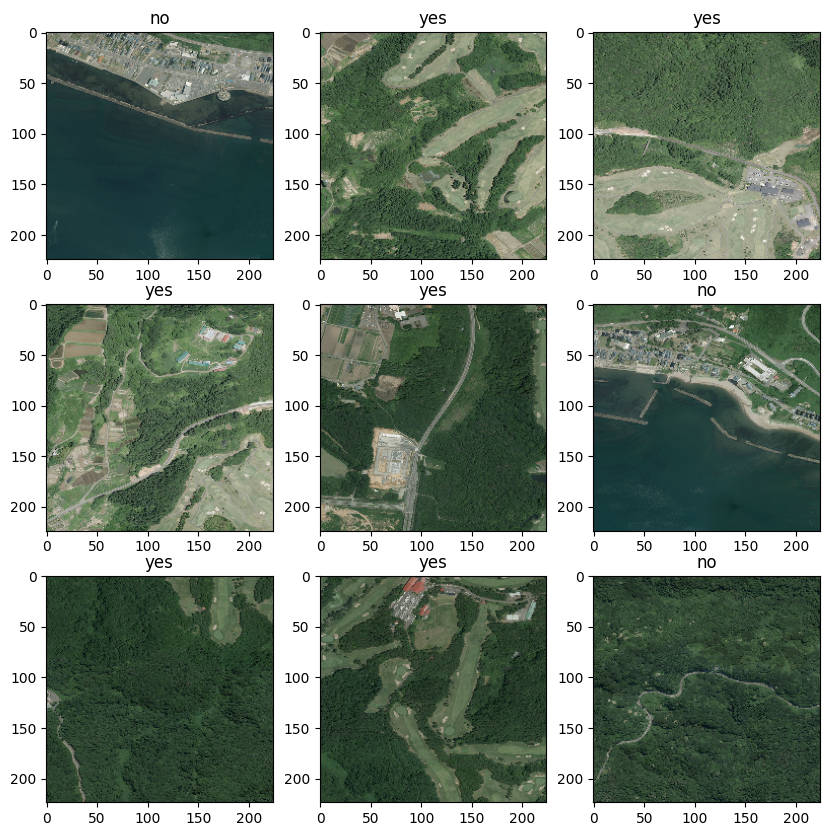

In [ ]:
# 訓練データの一部を表示して確認
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

### モデルを作って学習する

#### MobileNetV2の学習済みモデルを読み込む

In [ ]:
# MobileNetV2モデルを作成する
input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


#### 出力層を作成する

In [ ]:
# Dense層を追加する
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

#### モデルを完成させる

In [ ]:
# base_modelに先ほどのDense層を追加したモデルを作成する
model = tf.keras.Sequential([
    base_model,
    output_layer
])

In [ ]:
# modelをcompileする
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [ ]:
# modelに学習させる
model.fit(train_dataset, epochs=20)

Epoch 1/20
6/6 [==============================] - 9s 548ms/step - loss: 0.6542 - accuracy: 0.6250
Epoch 2/20
6/6 [==============================] - 4s 544ms/step - loss: 0.4260 - accuracy: 0.8833
Epoch 3/20
6/6 [==============================] - 5s 824ms/step - loss: 0.2988 - accuracy: 0.9417
Epoch 4/20
6/6 [==============================] - 4s 596ms/step - loss: 0.2136 - accuracy: 0.9500
Epoch 5/20
6/6 [==============================] - 6s 908ms/step - loss: 0.1676 - accuracy: 0.9583
Epoch 6/20
6/6 [==============================] - 4s 537ms/step - loss: 0.1311 - accuracy: 0.9833
Epoch 7/20
6/6 [==============================] - 4s 578ms/step - loss: 0.1085 - accuracy: 0.9833
Epoch 8/20
6/6 [==============================] - 6s 868ms/step - loss: 0.0903 - accuracy: 0.9917
Epoch 9/20
6/6 [==============================] - 4s 546ms/step - loss: 0.0782 - accuracy: 0.9917
Epoch 10/20
6/6 [==============================] - 4s 543ms/step - loss: 0.0681 - accuracy: 1.0000
Epoch 11/20
6/6 [==

In [ ]:
# テストデータで分類を実行する
pred_data = model.predict(test_dataset)

1/1 [==============================] - 4s 4s/step


In [ ]:
# 分類した結果を確認する
pred_data

array([[0.05198969],
       [0.4827245 ],
       [0.06772915],
       [0.9867694 ],
       [0.31471148],
       [0.9399295 ]], dtype=float32)

In [ ]:
# evaluate()でモデルの性能を評価する
model.evaluate(test_dataset)

1/1 [==============================] - 4s 4s/step - loss: 0.3357 - accuracy: 0.8333


[0.3356783092021942, 0.8333333134651184]